Загрузите данные по ЕГЭ за последние годы

https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv

выберите данные за 2018-2019 учебный год.

Выберите тип диаграммы для отображения результатов по административному округу Москвы,

постройте выбранную диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше.

Выберите тип диаграммы и постройте ее для районов Северо-Западного административного округа Москвы для количества школьников, написавших ЕГЭ на 220 баллов и выше.
Вопросы к этому заданию

Сколько таких школьников в Строгино?

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=';')
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
data["District"] = data["District"].apply(lambda x: ' '.join(list(str(x).split(" ")[1:])))
data = data[data["YEAR"] == '2018-2019']
data = data[data["AdmArea"] == 'Северо-Западный']
data.head()

,ID,EDU_NAME,global_id,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160,Unnamed: 8
1518,9754,Государственное бюджетное общеобразовательное ...,1011905087,2018-2019,Северо-Западный,Куркино,61,101,NaN
1519,9755,Автономная некоммерческая организация средняя ...,1011905088,2018-2019,Северо-Западный,Щукино,4,5,NaN
1520,9756,Государственное бюджетное общеобразовательное ...,1011905089,2018-2019,Северо-Западный,Южное Тушино,18,40,NaN
1521,9757,Негосударственное образовательное учреждение с...,1011905090,2018-2019,Северо-Западный,Южное Тушино,0,2,NaN
1553,9789,Государственное бюджетное общеобразовательное ...,1011905122,2018-2019,Северо-Западный,Хорошёво-Мнёвники,23,62,NaN


##    1. df.plot.line() + annotate
#### replace " line " with  " area " to plot filled area

In [99]:
dataset1 = pd.DataFrame(data["PASSES_OVER_220"].reset_index(drop=True))
dataset1.head()

,PASSES_OVER_220
0,61
1,4
2,18
3,0
4,23


In [254]:
dataset1.values[i][0]

48

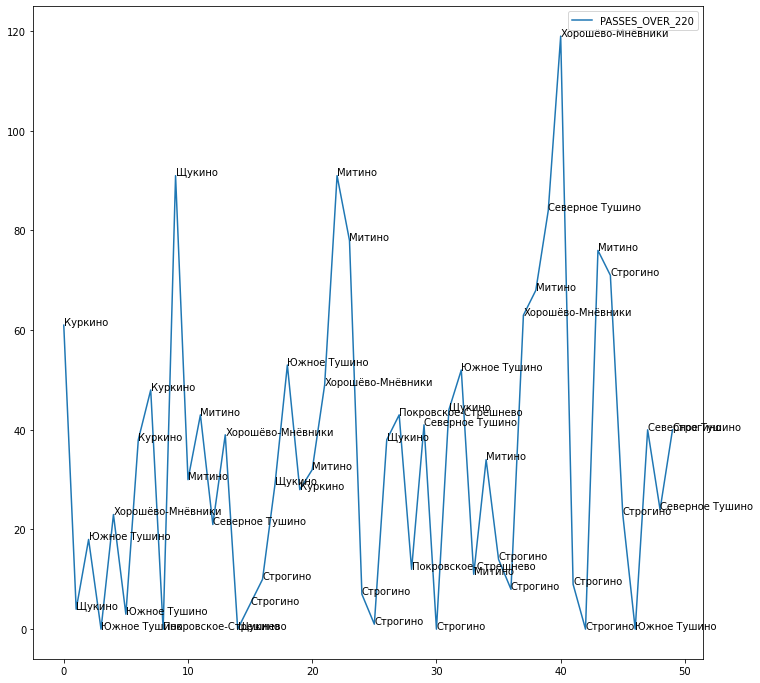

In [151]:
fig = plt.figure(figsize=(12, 12))
area = fig.add_subplot(1, 1, 1)
dataset1.plot.line(ax=area, label="line plot")
for i in dataset1.index:
    area.annotate(data.loc[:, "District"].iloc[i],
                  xy=(dataset1.index[i], dataset1.values[i][0]))
plt.show()

## 2. Bar plot + grid + annotate

In [245]:
dataset2 = (data.loc[:, ["District", "PASSES_OVER_220"]]).groupby("District").sum()
dataset2

,PASSES_OVER_220
District,
Куркино,175
Митино,463
Покровское-Стрешнево,55
Северное Тушино,210
Строгино,188
Хорошёво-Мнёвники,293
Щукино,206
Южное Тушино,126


https://coderoad.ru/24943991/%D0%98%D0%B7%D0%BC%D0%B5%D0%BD%D0%B8%D1%82%D0%B5-%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB-%D1%81%D0%B5%D1%82%D0%BA%D0%B8-%D0%B8-%D1%83%D0%BA%D0%B0%D0%B6%D0%B8%D1%82%D0%B5-%D0%BC%D0%B5%D1%82%D0%BA%D0%B8-%D0%A2%D0%98%D0%9A%D0%BE%D0%B2-%D0%B2-Matplotlib

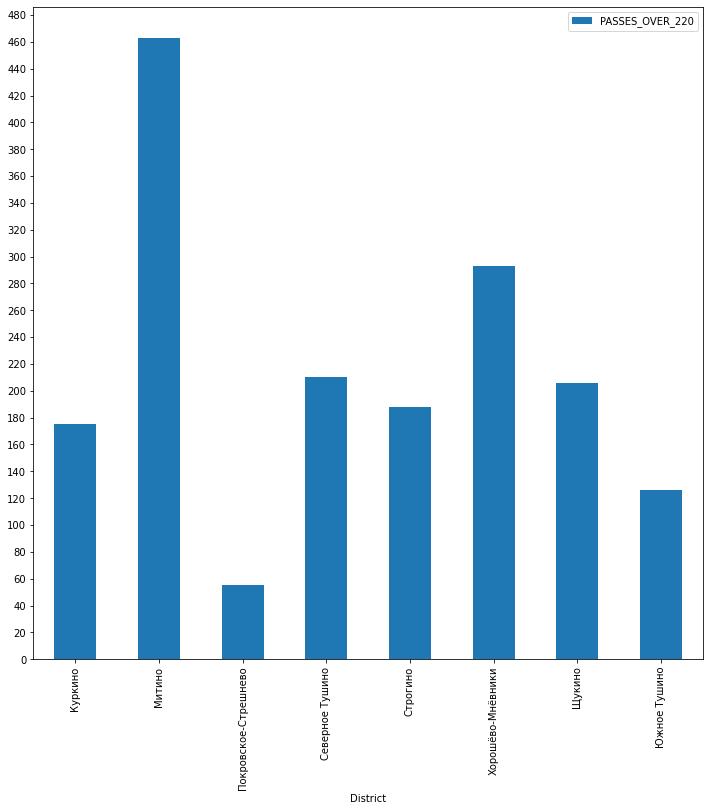

In [255]:
fig = plt.figure(figsize=(12, 12))
axs = fig.add_subplot(1, 1, 1)
axs.set_yticks(np.arange(0, 481, 20))
axs.set_yticks(np.arange(0, 481, 20), minor=True)
axs.grid(which='minor', alpha=0.5)
axs.grid(which='major', alpha=0.9)
axs.grid(b=True, which='both', axis='y')
dataset2.plot.bar(ax=axs, label="bar plot")
plt.show()

In [270]:
datadata2.flatten()


array([175, 463,  55, 210, 188, 293, 206, 126], dtype=int64)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

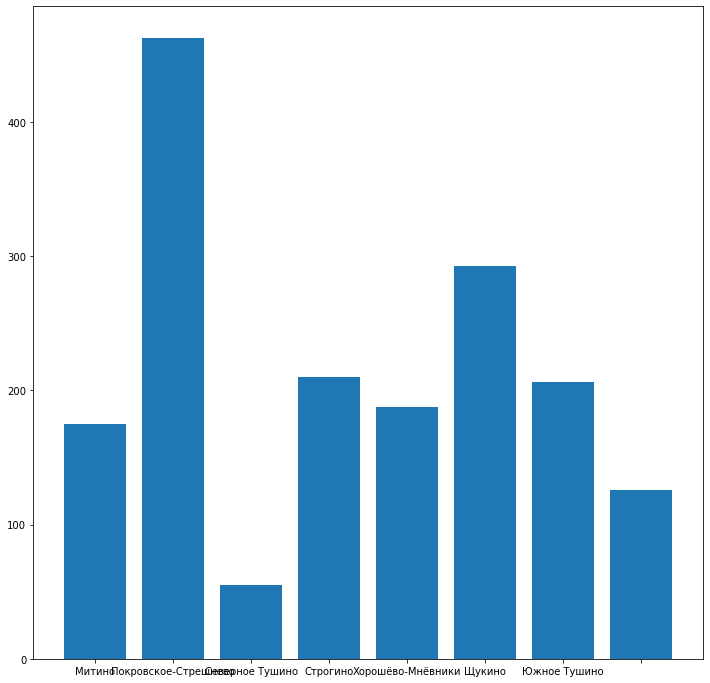

In [288]:
labels = dataset2.index
datadata2 = dataset2.values.flatten()
x = np.arange(len(labels))
fig = plt.figure(figsize=(12, 12))
axs = fig.add_subplot(1, 1, 1)
axs.set_xticklabels(labels)
rect1 = axs.bar(x, datadata2)
axs.bar_label(rect1, padding=3)
fig.tight_layout()
plt.show()

In [258]:
dataset2.loc["Строгино", "PASSES_OVER_220"]

188

In [259]:
type(data)

pandas.core.frame.DataFrame

In [260]:
type(data["District"])

pandas.core.series.Series

In [261]:
type(data.loc[:, ["District"]])

pandas.core.frame.DataFrame

### 3. pie

In [293]:
dataset2

,PASSES_OVER_220
District,
Куркино,175
Митино,463
Покровское-Стрешнево,55
Северное Тушино,210
Строгино,188
Хорошёво-Мнёвники,293
Щукино,206
Южное Тушино,126


In [302]:
dataset2["PASSES_OVER_220"]

District
Куркино                 175
Митино                  463
Покровское-Стрешнево     55
Северное Тушино         210
Строгино                188
Хорошёво-Мнёвники       293
Щукино                  206
Южное Тушино            126
Name: PASSES_OVER_220, dtype: int64

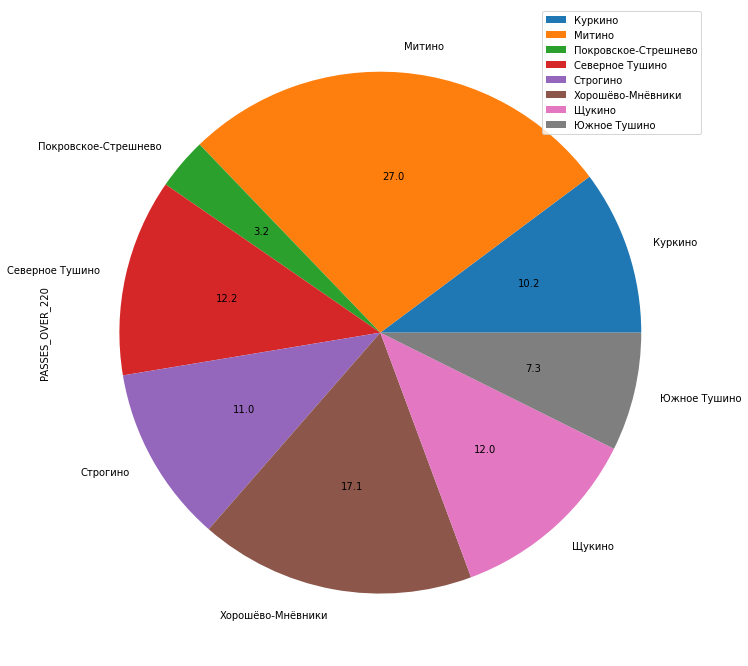

In [322]:
fig = plt.figure(figsize=(12, 12))
axs1 = fig.add_subplot(1, 1, 1)
total = dataset2["PASSES_OVER_220"].sum()
dataset2.plot.pie(y='PASSES_OVER_220', ax=axs1, autopct='%.1f')
plt.show()

In [307]:
dataset2

,PASSES_OVER_220
District,
Куркино,175
Митино,463
Покровское-Стрешнево,55
Северное Тушино,210
Строгино,188
Хорошёво-Мнёвники,293
Щукино,206
Южное Тушино,126


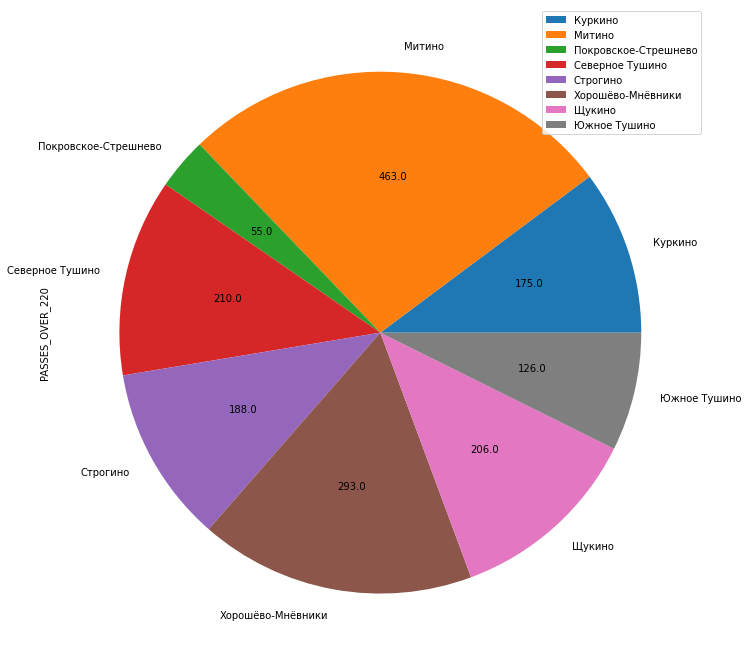

In [327]:
fig = plt.figure(figsize=(12, 12))
axs1 = fig.add_subplot(1, 1, 1)
total = dataset2["PASSES_OVER_220"].sum()
dataset2.plot.pie(y='PASSES_OVER_220', ax=axs1, 
                  autopct=(lambda x:round( x/100* total, 2)))
plt.show()